<a href="https://colab.research.google.com/github/Karuni001/Sign-Language-Generation-using-GAN/blob/main/Sign_language_using_GAN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from tensorflow.keras.optimizers import Adam

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [ ]:
import os
import pandas as pd

# kaggle API
# https://www.kaggle.com/docs/api
os.environ['KAGGLE_CONFIG_DIR'] = '/content'  # Adjust if needed

# Download the dataset
!kaggle datasets download -d datamunge/sign-language-mnist

# Unzip
!unzip sign-language-mnist.zip

# loading
train = pd.read_csv("sign_mnist_train/sign_mnist_train.csv")
test = pd.read_csv("sign_mnist_test/sign_mnist_test.csv")

In [ ]:
# Train data
print("Train shape: ", train.shape)
train

In [ ]:
# Test data
print("Test shape: ", test.shape)
test

In [ ]:
x_train = train.drop(labels = ["label"], axis = 1)
y_train = train["label"]

x_test = test.drop(labels = ["label"], axis = 1)
y_test = test["label"]

In [ ]:
x_train

In [ ]:
y_train

In [ ]:
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img,cmap = "gray")
        ax[i,j].axis("off")
        k += 1
plt.show()

In [ ]:
x_train = x_train / 255.0 # Normalization
x_train

In [ ]:
k = 0
row, col = 3, 3
fig, ax = plt.subplots(nrows=row, ncols=col, figsize=(16,20),)
for i in range(row):
    for j in range(col):
        img = x_train.iloc[k].to_numpy()
        img = img.reshape((28,28))
        ax[i,j].imshow(img,cmap = "gray")
        ax[i,j].axis("off")
        k += 1
plt.show()

In [ ]:
x_train = x_train.to_numpy()
x_train = x_train * 2 - 1
print("x_train shape: ", x_train.shape)
x_train

In [ ]:


def create_generator():

    generator = Sequential()
    generator.add(Dense(units = 256, input_dim = 100))
    generator.add(ReLU())

    generator.add(Dense(units = 512))
    generator.add(ReLU())

    generator.add(Dense(units = 1024))
    generator.add(ReLU())

    generator.add(Dense(units = 784, activation = "tanh"))

    generator.compile(loss = "binary_crossentropy",
                     optimizer = Adam(learning_rate = 0.0002, beta_1 = 0.5))

    return generator

In [ ]:
# Structure of Generator model
g = create_generator()
g.summary()

In [ ]:
def create_discriminator():
    discriminator = Sequential()
    discriminator.add(Dense(units = 1024, input_dim = 784))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units = 512))
    discriminator.add(ReLU())
    discriminator.add(Dropout(0.3))

    discriminator.add(Dense(units = 256))
    discriminator.add(ReLU())

    discriminator.add(Dense(units = 1, activation = "sigmoid"))

    discriminator.compile(loss = "binary_crossentropy",
                         optimizer = Adam(learning_rate = 0.02, beta_1 = 0.5))

    return discriminator

In [ ]:
# Structure of discriminator model
d = create_discriminator()
d.summary()

In [ ]:
def create_gan(discriminator, generator):
    discriminator.trainable = False
    gan_input = Input(shape = (100,))
    x = generator(gan_input)
    gan_output = discriminator(x)
    gan = Model(inputs = gan_input, outputs = gan_output)
    gan.compile(loss = "binary_crossentropy", optimizer = "adam")
    return gan

In [ ]:
# Structure of GANs model
gan = create_gan(d,g)
gan.summary()

In [ ]:
import time
import numpy as np
import gc

epochs = 300
batch_size = 70

dis_loss = []
gen_loss = []

for e in range(epochs):
    for _ in range(batch_size):
        start = time.time()
        noise = np.random.normal(0, 1, [batch_size, 100])

        generated_image = g.predict(noise)

        image_batch = x_train[np.random.randint(low = 0, high = x_train.shape[0], size = batch_size)]

        x = np.concatenate([image_batch, generated_image])

        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 0.9

        d.trainable = True
        dloss = d.train_on_batch(x, y_dis)


        #noise = np.random.normal(0, 1, [batch_size, 100])

        y_gen = np.ones(batch_size)

        d.trainable = False

        gloss =  gan.train_on_batch(noise, y_gen)

        end = time.time()
        process_time = str(end - start)

        del image_batch
        gc.collect()

  #  del large_variable  # Replace 'large_variable' with the actual variable name
   # import gc
   # gc.collect()  # Force garbage collection

    dis_loss.append(dloss)
    gen_loss.append(gloss)

    # Extract the last values from the lists if they are lists
    gloss_value = gloss[-1] if isinstance(gloss, list) else gloss
    dloss_value = dloss[-1] if isinstance(dloss, list) else dloss

    print("Epoch: {}, Time: {}s, Generator Loss: {:.3f}, Discriminator Loss: {:.3f}".format(e, process_time[2:4], gloss_value, dloss_value))

Streaming output truncated to the last 5000 lines.
3/3 [==============================] - 0s 3ms/step
Epoch: 229, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 230, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 231, Time: 14s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 232, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 4ms/step
Epoch: 233, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 234, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 235, Time: 13s, Generator Loss: 0.799, Discriminator Loss: 0.688
3/3 [==============================] - 0s 3ms/step
Epoch: 236, Time: 13s, Generator Loss

In [ ]:
g.save_weights("gans_model.weights.h5")

4/4 [==============================] - 0s 3ms/step


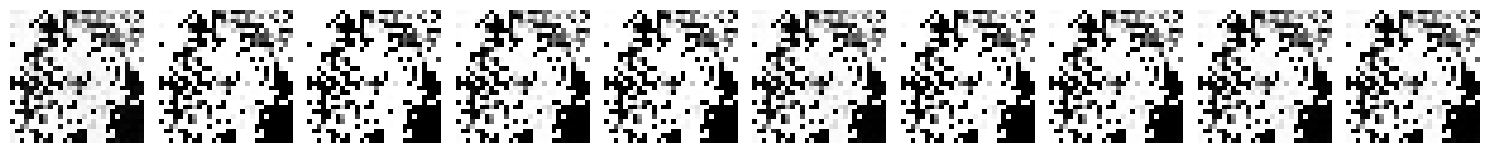

In [ ]:
noise = np.random.normal(loc = 0, scale = 1, size = [100,100])
generated_image = g.predict(noise)
generated_image = generated_image.reshape(100, 28, 28)
plt.figure(figsize=(15,17))
for i in range(0,10):
    plt.subplot(1, 10, i+1)
    plt.imshow(generated_image[i], interpolation = "nearest", cmap = "gray")
    plt.axis("off")
    plt.tight_layout()
plt.show()

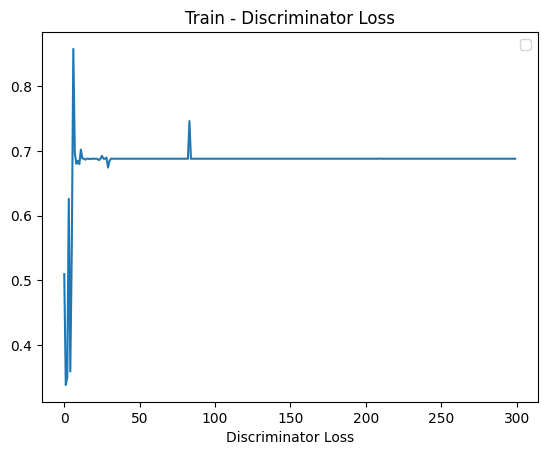

In [ ]:
# Train and Test Discriminator Loss graphic
epochs_number = []
for i in range(0,epochs):
    epochs_number.append(i)

plt.plot(epochs_number, dis_loss)
plt.title("Train - Discriminator Loss")
plt.xlabel("Number of Epochs")
plt.xlabel("Discriminator Loss")
plt.legend()
plt.show()

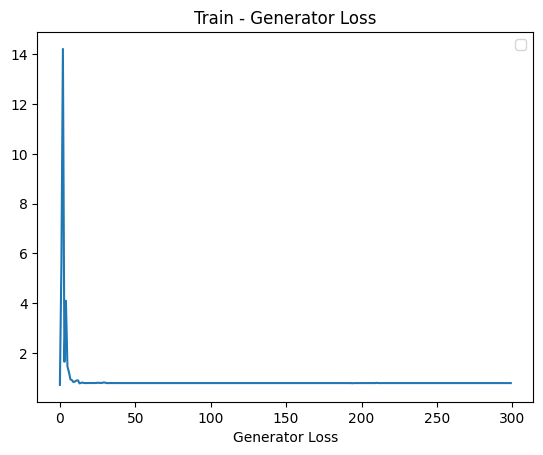

In [ ]:
# Train and Test Generator Loss graphic
plt.plot(epochs_number, gen_loss)
plt.title("Train - Generator Loss")
plt.xlabel("Number of Epochs")
plt.xlabel("Generator Loss")
plt.legend()
plt.show()

https://www.datacamp.com/tracks/ai-fundamentals

https://sci-hub.se/


https://www.researchgate.net/profile/Sugandhi-Sugandhi/publication/341144103_Sign_Language_Generation_System_Based_on_Indian_Sign_Language_Grammar/links/60494c1f92851c1bd4defb1a/Sign-Language-Generation-System-Based-on-Indian-Sign-Language-Grammar.pdf

https://arxiv.org/pdf/2106.12790


https://arxiv.org/pdf/2203.09679


https://ieeexplore.ieee.org/stamp/stamp.jsp?arnumber=9905589

https://assets-eu.researchsquare.com/files/rs-766083/v1_covered.pdf?c=1631875561

https://citeseerx.ist.psu.edu/document?repid=rep1&type=pdf&doi=7481f94c9922060fe649aedff3bcec1f8d9d7f84

https://openaccess.thecvf.com/content/CVPR2021W/ChaLearn/papers/Rastgoo_Sign_Language_Production_A_Review_CVPRW_2021_paper.pdf

https://openaccess.thecvf.com/content_cvpr_2017/papers/Cao_Realtime_Multi-Person_2D_CVPR_2017_paper.pdf

https://ietresearch.onlinelibrary.wiley.com/doi/full/10.1049/rsn2.12565

https://dl.acm.org/doi/abs/10.1145/3490035.3490301

https://chooser.crossref.org/?doi=10.1049%2Fic%3A20000136

https://dl.acm.org/doi/10.5555/3295222.3295408

https://d1wqtxts1xzle7.cloudfront.net/82179482/0906-libre.pdf?1647335598=&response-content-disposition=inline%3B+filename%3DSign_Language_Production_Using_Neural_Ma.pdf&Expires=1725349946&Signature=IcSzLCXUfupgyGyV6ggItFNeHngLwpIRK~O9EdyvYewNh6b9VQeJcn0peBrVbDXd0hGPxzeHtYHwopB6Sk-A~oN2cYK9HdY-z3TVVdmFYoQXsG7Xn4U14cOymaoiPv8ejvZO5rXxljdXPOUNTI86ld-6vO1WdxBbbo4BaSLZIap16qDefDJxTvxMSaJslI-7X8kuPI4LMSub9-qvPVXddk4K9mv600gxx0JuHEuJt~7a34aJezAv6RIm~Vmov6YPuwXNEHqHwSad-fdkCjl1wLrZfT5pep43YzBteR1eH-hMCAHsW642o4yYTLlExexE91o4yPewM37vAwYp7WM78w__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

https://d1wqtxts1xzle7.cloudfront.net/82179482/0906-libre.pdf?1647335598=&response-content-disposition=inline%3B+filename%3DSign_Language_Production_Using_Neural_Ma.pdf&Expires=1725349948&Signature=e2RxM9JOBBthGtlOir9RnRXt-YEbClYiShQva5Ym5gXfRlvpuIxQCIU5sJXVpsMLzwPf3KhQLledC2I1DO8f-H95voz0X3T3qjitUKAUfsr2tVEtwCEdfm90P2l8f7LABNF17RIkaQm4EycEzge3jE3JvvJPAfiEyZSBzozhXKMqwjs5IO2WVwWtPYiaOVh4ISHkAX3kFKl10jTfNwP8fhRU1r-rq-6l-Ar8NHD-ZH-1DTfLIq0yg6X1C1sf-KGjZ4avrk6YJILwiwMazw9TGlyrE7g8EQ5tcZhV~pOEEzXLvhw0-xeHJap04LvkQMPBWk3HEec2C37wxknqnE~FVg__&Key-Pair-Id=APKAJLOHF5GGSLRBV4ZA

https://openaccess.thecvf.com/content/CVPR2021W/ChaLearn/papers/Rastgoo_Sign_Language_Production_A_Review_CVPRW_2021_paper.pdf






https://arxiv.org/pdf/1406.2661